In [116]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!which python
print(tf.__version__)


/home/lol/Desktop/Labs/AI/.venv/bin/python
2.2.0


In [117]:
import glob
import cv2

def read_glob(path):
    arr = []
    files = glob.glob(path)
    for filepath in sorted(files):
        img = cv2.imread(filepath,0)
        # print(img.shape)
        img = img.reshape(32,32,1)
        # print(img.shape)
        img = img / 255
        arr.append(img)
    return np.array(arr)

happy = read_glob("./crop/happy/happy_linq/*.png")
normal = read_glob("./crop/normal/normal_linq/*.png")
sad = read_glob("./crop/sad/sad_linq/*.png")



my_happy = read_glob("./crop/happy/happy/*.png")
my_normal = read_glob("./crop/normal/m/*.png")

my = np.concatenate([my_happy,my_normal])
kk = keras.utils.to_categorical(
    np.concatenate([
    np.array([0]*len(my_happy)),
    np.array([1]*len(my_normal))
    # np.array([2]*len(sad))
]),
    num_classes=3
)

images = np.concatenate([happy,normal,sad])
k = keras.utils.to_categorical(
    np.concatenate([
    np.array([0]*len(happy)),
    np.array([1]*len(normal)),
    np.array([2]*len(sad))
]),
    num_classes=3
)

In [118]:
from numpy.random import seed
seed(2)
from tensorflow import random as tfrand
tfrand.set_seed(8)

model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,1),name="input"))
model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*2, activation='relu', name="process", input_dim=32*32))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(32,32,1)))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# # model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(320, activation='relu'))
# # model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()


history = model.fit(images, k, epochs=28, validation_data=(my, kk), batch_size=4)

Epoch 1/28
66/66 [==============================] - 0s 4ms/step - loss: 1.2100 - accuracy: 0.3688 - val_loss: 1.2577 - val_accuracy: 0.0000e+00
Epoch 2/28
66/66 [==============================] - 0s 3ms/step - loss: 1.1177 - accuracy: 0.3840 - val_loss: 1.0156 - val_accuracy: 0.4924
Epoch 3/28
66/66 [==============================] - 0s 3ms/step - loss: 1.0539 - accuracy: 0.4373 - val_loss: 0.9277 - val_accuracy: 0.5076
Epoch 4/28
66/66 [==============================] - 0s 3ms/step - loss: 1.0269 - accuracy: 0.5019 - val_loss: 0.9856 - val_accuracy: 0.6447
Epoch 5/28
66/66 [==============================] - 0s 3ms/step - loss: 0.9709 - accuracy: 0.5513 - val_loss: 0.9372 - val_accuracy: 0.6954
Epoch 6/28
66/66 [==============================] - 0s 3ms/step - loss: 0.9318 - accuracy: 0.5627 - val_loss: 0.8948 - val_accuracy: 0.5076
Epoch 7/28
66/66 [==============================] - 0s 3ms/step - loss: 0.8937 - accuracy: 0.6388 - val_loss: 0.8944 - val_accuracy: 0.5888
Epoch 8/28
66/66

In [119]:

# my_happy = read_glob("./crop/happy/happy/*.png")

test = model.evaluate(
    my,kk
)
print(test)


7/7 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.8223
[0.49933287501335144, 0.8223350048065186]


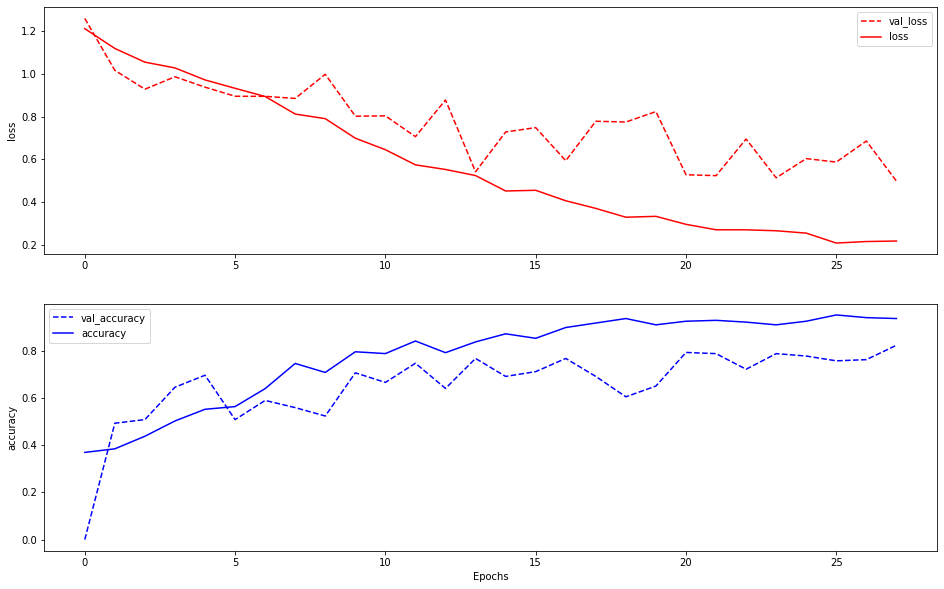

In [120]:

def plot_history(history):
    fig, axis = plt.subplots(2,figsize=(16,10))
    keys = ('loss','accuracy')
    cols = ('red', 'blue')
    loc = ("upper right", "lower right")

    for idx, key in enumerate(keys):
        axis[idx].plot(history.epoch, history.history["val_"+key],
                    '--', label="val_"+key, color=cols[idx])
        axis[idx].plot(history.epoch, history.history[key], color=cols[idx], label=key)
        axis[idx].legend(loc=loc[idx])
        axis[idx].set(ylabel=key)

    plt.xlabel('Epochs')
    plt.legend()

    # plt.xlim([0,max(history.epoch)])
# plot_history([('test',test)])

plot_history(history)